In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
# Open up PRC csv
filename_1= '../EDCOM/MCA_JOBLIST_COMBINED.csv'
prc_df = pd.read_csv(filename_1)
prc_df['Job Title'] = prc_df['Job Title'].str.strip()

# Open up EDCOM csv
filename_1= '../EDCOM/MCA Job List Tagged FINAL.csv'
edcom_df = pd.read_csv(filename_1)
edcom_df['Job Title'] = edcom_df['Job Title'].str.strip()

# Open up WorldBank csv
filename_2 = '../WorldBank/final_mca_aioe_comple.csv'
worldbank_df = pd.read_csv(filename_2)

# Combine the PRC and EDCOM and then with WorldBank
overall_edcom_df = edcom_df.merge(prc_df, on='Job Title')
combined_df = overall_edcom_df.merge(worldbank_df, on='Job Title')
passers_filt = combined_df['passers_2023_agg'].notna()

relevant_cols = [
    "Job Title",
    "Job Sector",
    "Job Subsector",
    "Educational Pathway",
    "HEI with PRC (Professional Regulation Commission) Exam",
    "Some HEI",
    "Priority Sector (Y/N)_x",
    "Priority Sector",
    "passers_2023_agg",
    "examinees_2023_agg", 
    "passers_2024_agg",
    "examinees_2024_agg",
    "AIOE",
    "Complementarity",
    "C-AIOE",
    "Classification"
]

combined_df = combined_df[relevant_cols]

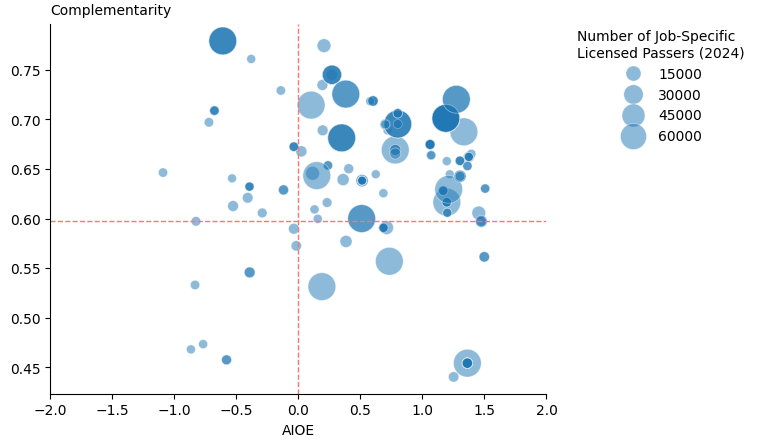

In [184]:
sns.scatterplot(
    x="AIOE", 
    y="Complementarity", 
    size="passers_2024_agg",
    sizes=(40, 400),
    alpha=0.5,
    data=combined_df[passers_filt]
)

plt.axvline(x=0, color="#f77777", linestyle='--', linewidth=1)
plt.axhline(
    y=combined_df['Complementarity'].median(),
    color='#f77777', linestyle='--', linewidth=1
)

plt.ylabel('Complementarity', ha='left', rotation=0)
plt.gca().yaxis.set_label_coords(0, 1.02)
plt.xlim(-2, 2)

# --- move legend outside on the right & rename title ---
legend = plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    frameon=False,
    title="Number of Job-Specific\nLicensed Passers (2024)"
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [192]:
normalized_licensed = (
    combined_df[passers_filt]
    .groupby('Classification')['passers_2024_agg']
    .sum()
)

normalized_licensed = normalized_licensed / normalized_licensed.sum()
normalized_licensed

Classification
Augmented    0.783556
Displaced    0.111962
Isolated     0.008454
Protected    0.096028
Name: passers_2024_agg, dtype: float64

Text(0, 0.5, '')

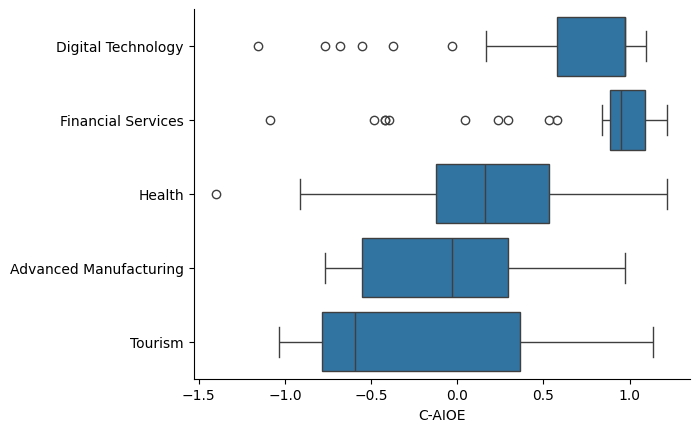

In [97]:
order = (
    combined_df.loc[combined_df["Priority Sector"] != "N"]
    .groupby("Priority Sector")["C-AIOE"]
    .median()
    .sort_values(ascending=False)
    .index
)

#plt.figure(figsize=(12, 5))
sns.boxplot(data=combined_df.loc[combined_df["Priority Sector"] != "N"],
            y='Priority Sector',
            x='C-AIOE',
            order=order)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('')

In [179]:
combined_df.to_csv('../MCA_Job_List_EDCOM_WorldBank.csv')